In [ ]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Sample size
n_samples = 1000

# Generate data
data = {
'age': np.random.randint(18, 65, size=n_samples),
'gender': np.random.choice(['Male', 'Female'], size=n_samples),
'income': np.random.randint(20000, 100000, size=n_samples),
'daily_physical_activity': np.random.randint(0, 120, size=n_samples), # Minutes per day
'servings_fruits_veggies': np.random.randint(0, 10, size=n_samples), # Servings per day
'BMI': np.random.uniform(18.5, 40, size=n_samples),
'self_reported_health_status': np.random.choice(['Poor', 'Fair', 'Good', 'Very Good',
'Excellent'], size=n_samples)
}

# Create DataFrame
df = pd.DataFrame(data)

# Display the first few rows of the dataframe
print(df.head())

df.to_csv('dataset.csv', index=False)

   age  gender  income  daily_physical_activity  servings_fruits_veggies  \
0   56    Male   49241                        2                        7   
1   46  Female   64569                       86                        6   
2   32  Female   31745                       89                        5   
3   60  Female   46029                       36                        6   
4   25    Male   33025                       87                        4   

         BMI self_reported_health_status  
0  24.346840                   Excellent  
1  33.385717                        Fair  
2  24.177333                   Excellent  
3  38.689972                        Good  
4  32.182047                        Fair  


In [ ]:
df

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status
0,56,Male,49241,2,7,24.346840,Excellent
1,46,Female,64569,86,6,33.385717,Fair
2,32,Female,31745,89,5,24.177333,Excellent
3,60,Female,46029,36,6,38.689972,Good
4,25,Male,33025,87,4,32.182047,Fair
...,...,...,...,...,...,...,...
995,22,Male,42669,38,2,23.240484,Excellent
996,40,Male,90968,66,9,31.951492,Excellent
997,27,Female,40644,7,6,30.789564,Poor
998,61,Male,38745,86,1,22.474026,Good


# Analisis Data Eksplorasi (EDA)

In [ ]:
# Tampilkan beberapa baris lima pertama
df.head()


,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status
0,56,Male,49241,2,7,24.346840,Excellent
1,46,Female,64569,86,6,33.385717,Fair
2,32,Female,31745,89,5,24.177333,Excellent
3,60,Female,46029,36,6,38.689972,Good
4,25,Male,33025,87,4,32.182047,Fair


In [ ]:
# Tampilkan beberapa baris lima terakhir
df.tail()

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status
995,22,Male,42669,38,2,23.240484,Excellent
996,40,Male,90968,66,9,31.951492,Excellent
997,27,Female,40644,7,6,30.789564,Poor
998,61,Male,38745,86,1,22.474026,Good
999,19,Male,48228,77,0,19.781123,Excellent


In [ ]:
# Tampilan data dengan jumlah baris dan jumlah kolom
df.shape

(1000, 7)

In [ ]:
# Menampilkan jumlah data yang duplicated
duplicated_rows_df = df[df.duplicated()]
print("Number of duplicated rows:",duplicated_rows_df)

Number of duplicated rows: Empty DataFrame
Columns: [age, gender, income, daily_physical_activity, servings_fruits_veggies, BMI, self_reported_health_status]
Index: []


In [ ]:
# Jumlah seluruh baris
df.count()

age                            1000
gender                         1000
income                         1000
daily_physical_activity        1000
servings_fruits_veggies        1000
BMI                            1000
self_reported_health_status    1000
dtype: int64

# Pemrosesan dan Pembersihan Data

In [ ]:
# Menampilkan data yang bersifat missing value
df.isnull().sum()

age                            0
gender                         0
income                         0
daily_physical_activity        0
servings_fruits_veggies        0
BMI                            0
self_reported_health_status    0
dtype: int64

In [ ]:
df

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status
0,56,Male,49241,2,7,24.346840,Excellent
1,46,Female,64569,86,6,33.385717,Fair
2,32,Female,31745,89,5,24.177333,Excellent
3,60,Female,46029,36,6,38.689972,Good
4,25,Male,33025,87,4,32.182047,Fair
...,...,...,...,...,...,...,...
995,22,Male,42669,38,2,23.240484,Excellent
996,40,Male,90968,66,9,31.951492,Excellent
997,27,Female,40644,7,6,30.789564,Poor
998,61,Male,38745,86,1,22.474026,Good


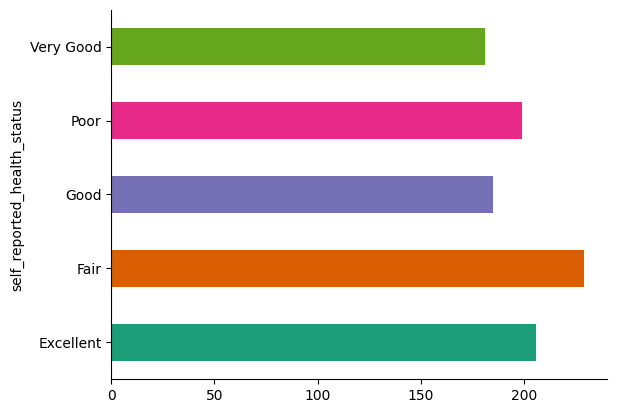

In [ ]:
# @title self_reported_health_status

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('self_reported_health_status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Membuat mapping
mapping = {'Poor': 0, 'Fair': 1, 'Good': 2, 'Very Good': 3, 'Excellent': 4}

# Menggunakan fungsi map untuk mengganti nilai
df['self_reported_health_status'] = df['self_reported_health_status'].map(mapping)

# Tampilkan hasil
df

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status
0,56,Male,49241,2,7,24.346840,4
1,46,Female,64569,86,6,33.385717,1
2,32,Female,31745,89,5,24.177333,4
3,60,Female,46029,36,6,38.689972,2
4,25,Male,33025,87,4,32.182047,1
...,...,...,...,...,...,...,...
995,22,Male,42669,38,2,23.240484,4
996,40,Male,90968,66,9,31.951492,4
997,27,Female,40644,7,6,30.789564,0
998,61,Male,38745,86,1,22.474026,2


In [ ]:
# Membuat mapping
mapping = {'Male': 0, 'Female': 1}

# Menggunakan fungsi map untuk mengganti nilai
df['gender'] = df['gender'].map(mapping)

# Tampilkan hasil
df

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status
0,56,0,49241,2,7,24.346840,4
1,46,1,64569,86,6,33.385717,1
2,32,1,31745,89,5,24.177333,4
3,60,1,46029,36,6,38.689972,2
4,25,0,33025,87,4,32.182047,1
...,...,...,...,...,...,...,...
995,22,0,42669,38,2,23.240484,4
996,40,0,90968,66,9,31.951492,4
997,27,1,40644,7,6,30.789564,0
998,61,0,38745,86,1,22.474026,2


In [ ]:
# Membuat mapping untuk BMI
bmi_mapping = {
    'Underweight': lambda x: 'Underweight' if x < 18.5 else None,
    'Normal weight': lambda x: 'Normal weight' if 18.5 <= x < 25 else None,
    'Overweight': lambda x: 'Overweight' if 25 <= x < 30 else None,
    'Obese': lambda x: 'Obese' if x >= 30 else None
}

# Menggunakan fungsi apply untuk membuat kolom baru dengan kategori BMI
df['bmi_category'] = df['BMI'].apply(lambda x: next((category for category, condition in bmi_mapping.items() if condition(x)), None))

# Tampilkan hasil
df

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category
0,56,0,49241,2,7,24.346840,4,Normal weight
1,46,1,64569,86,6,33.385717,1,Obese
2,32,1,31745,89,5,24.177333,4,Normal weight
3,60,1,46029,36,6,38.689972,2,Obese
4,25,0,33025,87,4,32.182047,1,Obese
...,...,...,...,...,...,...,...,...
995,22,0,42669,38,2,23.240484,4,Normal weight
996,40,0,90968,66,9,31.951492,4,Obese
997,27,1,40644,7,6,30.789564,0,Obese
998,61,0,38745,86,1,22.474026,2,Normal weight


'**Underweight**': Fungsi ini akan mengembalikan ‘Underweight’ jika nilai BMI kurang dari 18.5.

'**Normal weight**': Fungsi ini akan mengembalikan ‘Normal weight’ jika nilai BMI berada di antara 18.5 dan 25.

'**Overweight**': Fungsi ini akan mengembalikan ‘Overweight’ jika nilai BMI berada di antara 25 dan 30.

'**Obese**': Fungsi ini akan mengembalikan ‘Obese’ jika nilai BMI lebih dari atau sama dengan 30.

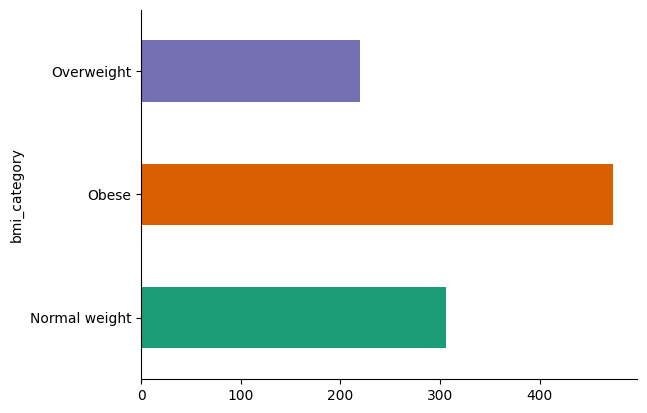

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('bmi_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Membuat mapping
mapping = {'Normal weight': 0, 'Overweight': 1, 'Obese':2}

# Menggunakan fungsi map untuk mengganti nilai
df['bmi_category'] = df['bmi_category'].map(mapping)

# Tampilkan hasil
df

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category
0,56,0,49241,2,7,24.346840,4,0
1,46,1,64569,86,6,33.385717,1,2
2,32,1,31745,89,5,24.177333,4,0
3,60,1,46029,36,6,38.689972,2,2
4,25,0,33025,87,4,32.182047,1,2
...,...,...,...,...,...,...,...,...
995,22,0,42669,38,2,23.240484,4,0
996,40,0,90968,66,9,31.951492,4,2
997,27,1,40644,7,6,30.789564,0,2
998,61,0,38745,86,1,22.474026,2,0


In [ ]:
# Membuat mapping untuk kategori asupan buah dan sayur
def categorize_servings(servings):
    if servings < 5:
        return 'Rendah'
    elif 5 <= servings <= 9:
        return 'Cukup'
    else:
        return 'Tinggi'

# Menggunakan fungsi apply untuk membuat kolom baru dengan kategori
df['fruit_veggie_category'] = df['servings_fruits_veggies'].apply(categorize_servings)

# Tampilkan hasil
df

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category,fruit_veggie_category
0,56,0,49241,2,7,24.346840,4,0,Cukup
1,46,1,64569,86,6,33.385717,1,2,Cukup
2,32,1,31745,89,5,24.177333,4,0,Cukup
3,60,1,46029,36,6,38.689972,2,2,Cukup
4,25,0,33025,87,4,32.182047,1,2,Rendah
...,...,...,...,...,...,...,...,...,...
995,22,0,42669,38,2,23.240484,4,0,Rendah
996,40,0,90968,66,9,31.951492,4,2,Cukup
997,27,1,40644,7,6,30.789564,0,2,Cukup
998,61,0,38745,86,1,22.474026,2,0,Rendah


Jika jumlah porsi kurang dari 5, fungsi ini akan mengembalikan ‘**Renda**h

Jika jumlah porsi berada di antara 5 dan 9 (inklusif), fungsi ini akan mengembalikan ‘**Cukup**’.

Jika jumlah porsi lebih dari 9, fungsi ini akan mengembalikan ‘**Tinggi**’

In [ ]:
# Membuat mapping
mapping = {'Rendah': 0, 'Cukup': 1, 'Tinggi':2}

# Menggunakan fungsi map untuk mengganti nilai
df['fruit_veggie_category'] = df['fruit_veggie_category'].map(mapping)

# Tampilkan hasil
df

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category,fruit_veggie_category
0,56,0,49241,2,7,24.346840,4,0,1
1,46,1,64569,86,6,33.385717,1,2,1
2,32,1,31745,89,5,24.177333,4,0,1
3,60,1,46029,36,6,38.689972,2,2,1
4,25,0,33025,87,4,32.182047,1,2,0
...,...,...,...,...,...,...,...,...,...
995,22,0,42669,38,2,23.240484,4,0,0
996,40,0,90968,66,9,31.951492,4,2,1
997,27,1,40644,7,6,30.789564,0,2,1
998,61,0,38745,86,1,22.474026,2,0,0


In [ ]:
# Membuat mapping untuk kategori aktivitas fisik
def categorize_activity(activity_minutes):
    if activity_minutes < 30:
        return 'Rendah'
    elif 30 <= activity_minutes <= 60:
        return 'Sedang'
    else:
        return 'Tinggi'

# Menggunakan fungsi apply untuk membuat kolom baru dengan kategori
df['activity_category'] = df['daily_physical_activity'].apply(categorize_activity)

# Tampilkan hasil
df

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category,fruit_veggie_category,activity_category
0,56,0,49241,2,7,24.346840,4,0,1,Rendah
1,46,1,64569,86,6,33.385717,1,2,1,Tinggi
2,32,1,31745,89,5,24.177333,4,0,1,Tinggi
3,60,1,46029,36,6,38.689972,2,2,1,Sedang
4,25,0,33025,87,4,32.182047,1,2,0,Tinggi
...,...,...,...,...,...,...,...,...,...,...
995,22,0,42669,38,2,23.240484,4,0,0,Sedang
996,40,0,90968,66,9,31.951492,4,2,1,Tinggi
997,27,1,40644,7,6,30.789564,0,2,1,Rendah
998,61,0,38745,86,1,22.474026,2,0,0,Tinggi


Jika durasi aktivitas kurang dari 30 menit, fungsi ini akan mengembalikan ‘**Rendah**’.

Jika durasi aktivitas berada di antara 30 dan 60 menit (inklusif), fungsi ini akan mengembalikan ‘**Sedang**’.

Jika durasi aktivitas lebih dari 60 menit, fungsi ini akan mengembalikan ‘**Tinggi**’.

In [ ]:
# Membuat mapping
mapping = {'Rendah': 0, 'Cukup': 1, 'Tinggi':2}

# Menggunakan fungsi map untuk mengganti nilai
df['activity_category'] = df['activity_category'].map(mapping)

# Tampilkan hasil
df

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category,fruit_veggie_category,activity_category
0,56,0,49241,2,7,24.346840,4,0,1,0.0
1,46,1,64569,86,6,33.385717,1,2,1,2.0
2,32,1,31745,89,5,24.177333,4,0,1,2.0
3,60,1,46029,36,6,38.689972,2,2,1,NaN
4,25,0,33025,87,4,32.182047,1,2,0,2.0
...,...,...,...,...,...,...,...,...,...,...
995,22,0,42669,38,2,23.240484,4,0,0,NaN
996,40,0,90968,66,9,31.951492,4,2,1,2.0
997,27,1,40644,7,6,30.789564,0,2,1,0.0
998,61,0,38745,86,1,22.474026,2,0,0,2.0


In [ ]:
df = df.dropna()


In [ ]:
df.isnull().sum()

age                            0
gender                         0
income                         0
daily_physical_activity        0
servings_fruits_veggies        0
BMI                            0
self_reported_health_status    0
bmi_category                   0
fruit_veggie_category          0
activity_category              0
dtype: int64

In [ ]:
df

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category,fruit_veggie_category,activity_category
0,56,0,49241,2,7,24.346840,4,0,1,0.0
1,46,1,64569,86,6,33.385717,1,2,1,2.0
2,32,1,31745,89,5,24.177333,4,0,1,2.0
4,25,0,33025,87,4,32.182047,1,2,0,2.0
6,56,0,26540,18,0,24.294505,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
992,50,0,70601,110,9,39.095836,4,2,1,2.0
996,40,0,90968,66,9,31.951492,4,2,1,2.0
997,27,1,40644,7,6,30.789564,0,2,1,0.0
998,61,0,38745,86,1,22.474026,2,0,0,2.0


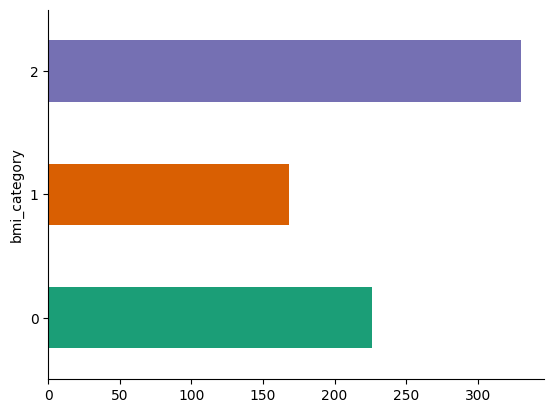

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('bmi_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

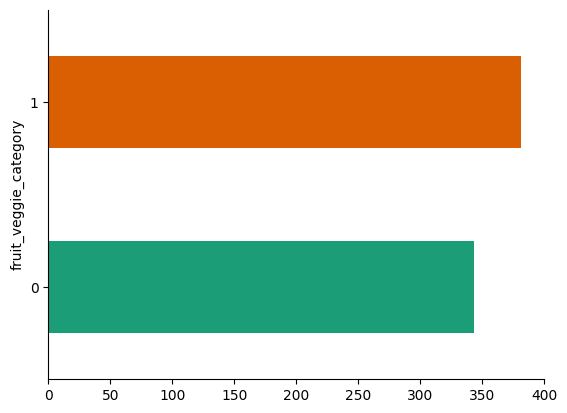

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('fruit_veggie_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

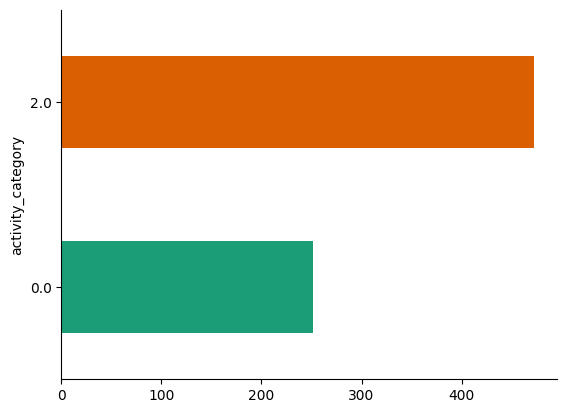

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('activity_category').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category,fruit_veggie_category,activity_category
0,56,0,49241,2,7,24.346840,4,0,1,0.0
1,46,1,64569,86,6,33.385717,1,2,1,2.0
2,32,1,31745,89,5,24.177333,4,0,1,2.0
4,25,0,33025,87,4,32.182047,1,2,0,2.0
6,56,0,26540,18,0,24.294505,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
992,50,0,70601,110,9,39.095836,4,2,1,2.0
996,40,0,90968,66,9,31.951492,4,2,1,2.0
997,27,1,40644,7,6,30.789564,0,2,1,0.0
998,61,0,38745,86,1,22.474026,2,0,0,2.0


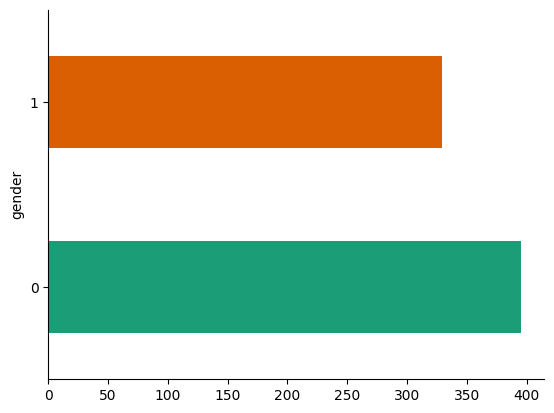

In [ ]:
# @title gender

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('gender').size().plot(kind='barh', color=sns.palettes.mpl_palette(''))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category,fruit_veggie_category,activity_category
0,56,0,49241,2,7,24.346840,4,0,1,0.0
1,46,1,64569,86,6,33.385717,1,2,1,2.0
2,32,1,31745,89,5,24.177333,4,0,1,2.0
4,25,0,33025,87,4,32.182047,1,2,0,2.0
6,56,0,26540,18,0,24.294505,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
992,50,0,70601,110,9,39.095836,4,2,1,2.0
996,40,0,90968,66,9,31.951492,4,2,1,2.0
997,27,1,40644,7,6,30.789564,0,2,1,0.0
998,61,0,38745,86,1,22.474026,2,0,0,2.0


In [ ]:
import pandas as pd
# Hitung frekuensi setiap nilai unik dalam kolom 'self_reported_health_status'
health_status_counts = df['self_reported_health_status'].value_counts()

# Tampilkan hasil
print("Frekuensi Status Kesehatan:")
print(health_status_counts)


Frekuensi Status Kesehatan:
1    168
4    152
0    139
2    135
3    130
Name: self_reported_health_status, dtype: int64


# Visualisasi dan Statistik Ringkasan

In [ ]:
pip install plotly


In [ ]:
import plotly.express as px

# Hitung jumlah masing-masing jenis kelamin
gender_counts = df['gender'].value_counts()

# Buat pie chart
fig = px.pie(gender_counts, labels=gender_counts.index, values=gender_counts.values,
             title='Distribution of Gender', names=gender_counts.index)
fig.update_layout(title_text='Distribution of Gender')
fig.show()


/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  return args["labels"][column]


In [ ]:
import plotly.express as px

# Count the occurrences of each health status
health_status_counts = df['self_reported_health_status'].value_counts()

# Create a pie chart
fig = px.pie(health_status_counts, labels=health_status_counts.index, values=health_status_counts.values,
             title='Distribution of Self-Reported Health Status', names=health_status_counts.index)
fig.update_layout(title_text='Distribution of Self-Reported Health Status')
fig.show()


/usr/local/lib/python3.10/dist-packages/plotly/express/_core.py:137: FutureWarning:

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.



0: Poor
Label: Poor
Value: Number of individuals in the dataset who reported a health status of "Poor" (0)

1: Fair
Label: Fair
Value: Number of individuals in the dataset who reported a health status of "Fair" (1)

2: Good
Label: Good
Value: Number of individuals in the dataset who reported a health status of "Good" (2)

3: Very Good
Label: Very Good
Value: Number of individuals in the dataset who reported a health status of "Very Good" (3)

4: Excellent
Label: Excellent
Value: Number of individuals in the dataset who reported a health status of "Excellent" (4)

In [ ]:
# Statistik ringkasan
df.describe()

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category,fruit_veggie_category,activity_category
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,40.600829,0.454420,59231.129834,63.611878,4.639503,28.939934,1.983425,1.143646,0.526243,1.303867
std,13.677456,0.498262,22586.512701,38.689385,2.919129,6.132874,1.421919,0.865075,0.499656,0.953373
min,18.000000,0.000000,20162.000000,0.000000,0.000000,18.500660,0.000000,0.000000,0.000000,0.000000
25%,28.750000,0.000000,41714.000000,21.000000,2.000000,23.658610,1.000000,0.000000,0.000000,0.000000
50%,41.000000,0.000000,57565.000000,72.000000,5.000000,28.912005,2.000000,1.000000,1.000000,2.000000
75%,52.000000,1.000000,78439.000000,97.000000,7.000000,33.927411,3.000000,2.000000,1.000000,2.000000
max,64.000000,1.000000,99973.000000,119.000000,9.000000,39.976191,4.000000,2.000000,1.000000,2.000000


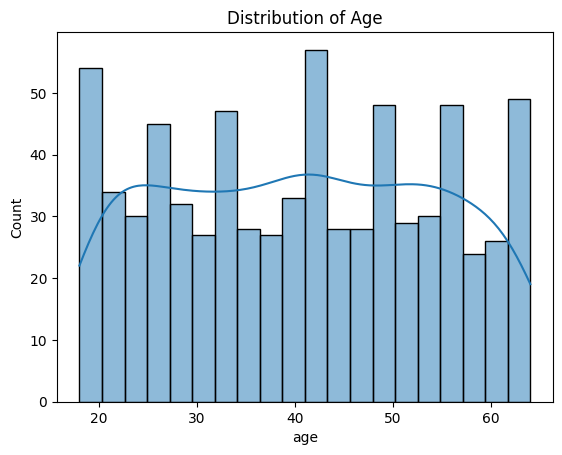

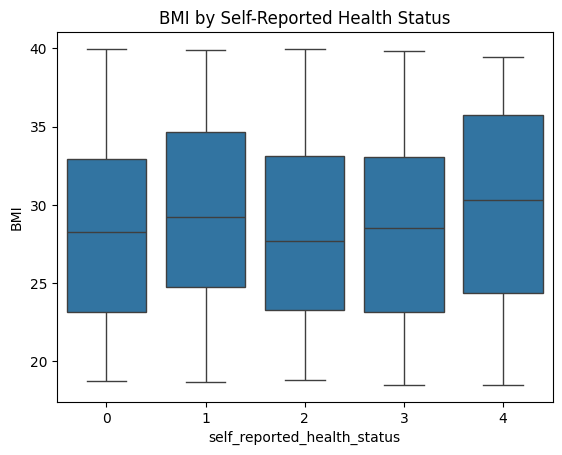

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi histogram
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.show()

# Visualisasi hubungan antara BMI dan status kesehatan
sns.boxplot(x='self_reported_health_status', y='BMI', data=df)
plt.title('BMI by Self-Reported Health Status')
plt.show()


In [ ]:
import plotly.express as px

# Visualisasi hubungan antara BMI dan status kesehatan
fig = px.box(df, x='self_reported_health_status', y='BMI', points='all')
fig.update_layout(title_text='BMI by Self-Reported Health Status', xaxis_title='Self-Reported Health Status', yaxis_title='BMI')
fig.show()


In [ ]:
df

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category,fruit_veggie_category,activity_category
0,56,0,49241,2,7,24.346840,4,0,1,0.0
1,46,1,64569,86,6,33.385717,1,2,1,2.0
2,32,1,31745,89,5,24.177333,4,0,1,2.0
4,25,0,33025,87,4,32.182047,1,2,0,2.0
6,56,0,26540,18,0,24.294505,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
992,50,0,70601,110,9,39.095836,4,2,1,2.0
996,40,0,90968,66,9,31.951492,4,2,1,2.0
997,27,1,40644,7,6,30.789564,0,2,1,0.0
998,61,0,38745,86,1,22.474026,2,0,0,2.0


In [ ]:
import plotly.express as px

# Create a histogram for age with separate histograms for each gender
fig = px.histogram(df, x='age', color='gender', title='Distribution of Age by Gender',
                   labels={'age': 'Age', 'gender': 'Gender', 'count': 'Count'})
fig.show()


#  Identifikasi dan tangani outlier

In [ ]:
from scipy.stats import zscore

# Identifikasi outlier menggunakan Z-score
z_scores = zscore(df[['age', 'income', 'daily_physical_activity', 'servings_fruits_veggies', 'BMI']])
outliers = (z_scores > 3) | (z_scores < -3)

# Hapus outlier
df = df[~outliers.all(axis=1)]
df

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category,fruit_veggie_category,activity_category
0,56,0,49241,2,7,24.346840,4,0,1,0.0
1,46,1,64569,86,6,33.385717,1,2,1,2.0
2,32,1,31745,89,5,24.177333,4,0,1,2.0
4,25,0,33025,87,4,32.182047,1,2,0,2.0
6,56,0,26540,18,0,24.294505,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
992,50,0,70601,110,9,39.095836,4,2,1,2.0
996,40,0,90968,66,9,31.951492,4,2,1,2.0
997,27,1,40644,7,6,30.789564,0,2,1,0.0
998,61,0,38745,86,1,22.474026,2,0,0,2.0


#Rekayasa Fitur

In [ ]:
# Misalnya, rasio aktivitas fisik harian terhadap BMI
df['activity_bmi_ratio'] = df['daily_physical_activity'] / df['BMI']
df


,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category,fruit_veggie_category,activity_category,activity_bmi_ratio
0,56,0,49241,2,7,24.346840,4,0,1,0.0,0.082146
1,46,1,64569,86,6,33.385717,1,2,1,2.0,2.575952
2,32,1,31745,89,5,24.177333,4,0,1,2.0,3.681134
4,25,0,33025,87,4,32.182047,1,2,0,2.0,2.703371
6,56,0,26540,18,0,24.294505,1,0,0,0.0,0.740908
...,...,...,...,...,...,...,...,...,...,...,...
992,50,0,70601,110,9,39.095836,4,2,1,2.0,2.813599
996,40,0,90968,66,9,31.951492,4,2,1,2.0,2.065631
997,27,1,40644,7,6,30.789564,0,2,1,0.0,0.227350
998,61,0,38745,86,1,22.474026,2,0,0,2.0,3.826640


In [ ]:
# Rekayasa fitur
df['age_times_BMI'] = df['age'] * df['BMI']
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 35, 50, 100], labels=['remaja', 'dewasa_muda', 'dewasa', 'lansia'])
df['activity_bmi_ratio_category'] = pd.cut(df['activity_bmi_ratio'], bins=[0, 1, 2, 3, float('inf')], labels=['sangat_rendah', 'rendah', 'sedang', 'tinggi'])
df['overall_diet_quality'] = df['servings_fruits_veggies'] / df['daily_physical_activity']


In [ ]:
df.head(10)

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category,fruit_veggie_category,activity_category,activity_bmi_ratio,age_times_BMI,age_group,activity_bmi_ratio_category,overall_diet_quality
0,56,0,49241,2,7,24.346840,4,0,1,0.0,0.082146,1363.423031,lansia,sangat_rendah,3.500000
1,46,1,64569,86,6,33.385717,1,2,1,2.0,2.575952,1535.742974,dewasa,sedang,0.069767
2,32,1,31745,89,5,24.177333,4,0,1,2.0,3.681134,773.674645,dewasa_muda,tinggi,0.056180
4,25,0,33025,87,4,32.182047,1,2,0,2.0,2.703371,804.551176,dewasa_muda,sedang,0.045977
6,56,0,26540,18,0,24.294505,1,0,0,0.0,0.740908,1360.492282,lansia,sangat_rendah,0.000000
7,36,0,88878,114,0,22.604922,4,0,0,2.0,5.043150,813.777177,dewasa,tinggi,0.000000
8,40,0,61846,88,8,33.434781,2,2,1,2.0,2.631990,1337.391225,dewasa,sedang,0.090909
9,28,0,95932,84,4,23.202386,2,0,0,2.0,3.620317,649.666799,dewasa_muda,tinggi,0.047619
10,28,0,37482,11,4,31.299020,2,2,0,0.0,0.351449,876.372566,dewasa_muda,sangat_rendah,0.363636
15,20,0,72307,116,8,34.858304,3,2,1,2.0,3.327758,697.166072,dewasa_muda,tinggi,0.068966


In [ ]:
import pandas as pd
# Hitung frekuensi setiap nilai unik dalam kolom 'age_group'
health_status_counts = df['age_group'].value_counts()

# Tampilkan hasil
print("age_group:")
print(health_status_counts)


age_group:
dewasa_muda    265
dewasa         236
lansia         206
remaja          17
Name: age_group, dtype: int64


In [ ]:
# Membuat mapping
mapping = {'remaja': 0, 'dewasa_muda': 1, 'dewasa':2 ,'lansia':3}

# Menggunakan fungsi map untuk mengganti nilai
df['age_group'] = df['age_group'].map(mapping)

# Tampilkan hasil
df

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category,fruit_veggie_category,activity_category,activity_bmi_ratio,age_times_BMI,age_group,activity_bmi_ratio_category,overall_diet_quality
0,56,0,49241,2,7,24.346840,4,0,1,0.0,0.082146,1363.423031,3,sangat_rendah,3.500000
1,46,1,64569,86,6,33.385717,1,2,1,2.0,2.575952,1535.742974,2,sedang,0.069767
2,32,1,31745,89,5,24.177333,4,0,1,2.0,3.681134,773.674645,1,tinggi,0.056180
4,25,0,33025,87,4,32.182047,1,2,0,2.0,2.703371,804.551176,1,sedang,0.045977
6,56,0,26540,18,0,24.294505,1,0,0,0.0,0.740908,1360.492282,3,sangat_rendah,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,50,0,70601,110,9,39.095836,4,2,1,2.0,2.813599,1954.791799,2,sedang,0.081818
996,40,0,90968,66,9,31.951492,4,2,1,2.0,2.065631,1278.059679,2,sedang,0.136364
997,27,1,40644,7,6,30.789564,0,2,1,0.0,0.227350,831.318241,1,sangat_rendah,0.857143
998,61,0,38745,86,1,22.474026,2,0,0,2.0,3.826640,1370.915559,3,tinggi,0.011628


In [ ]:
df

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category,fruit_veggie_category,activity_category,activity_bmi_ratio,age_times_BMI,age_group,activity_bmi_ratio_category,overall_diet_quality
0,56,0,49241,2,7,24.346840,4,0,1,0.0,0.082146,1363.423031,3,sangat_rendah,3.500000
1,46,1,64569,86,6,33.385717,1,2,1,2.0,2.575952,1535.742974,2,sedang,0.069767
2,32,1,31745,89,5,24.177333,4,0,1,2.0,3.681134,773.674645,1,tinggi,0.056180
4,25,0,33025,87,4,32.182047,1,2,0,2.0,2.703371,804.551176,1,sedang,0.045977
6,56,0,26540,18,0,24.294505,1,0,0,0.0,0.740908,1360.492282,3,sangat_rendah,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,50,0,70601,110,9,39.095836,4,2,1,2.0,2.813599,1954.791799,2,sedang,0.081818
996,40,0,90968,66,9,31.951492,4,2,1,2.0,2.065631,1278.059679,2,sedang,0.136364
997,27,1,40644,7,6,30.789564,0,2,1,0.0,0.227350,831.318241,1,sangat_rendah,0.857143
998,61,0,38745,86,1,22.474026,2,0,0,2.0,3.826640,1370.915559,3,tinggi,0.011628


In [ ]:
import pandas as pd
# Hitung frekuensi setiap nilai unik dalam kolom 'activity_bmi_ratio_category'
health_status_counts = df['activity_bmi_ratio_category'].value_counts()

# Tampilkan hasil
print("activity_bmi_ratio_category:")
print(health_status_counts)


activity_bmi_ratio_category:
tinggi           258
sangat_rendah    213
sedang           177
rendah            68
Name: activity_bmi_ratio_category, dtype: int64


In [ ]:
# Membuat mapping
mapping = {'sangat_rendah': 0, 'rendah': 1, 'sedang':2 ,'tinggi':3}

# Menggunakan fungsi map untuk mengganti nilai
df['activity_bmi_ratio_category'] = df['activity_bmi_ratio_category'].map(mapping)

# Tampilkan hasil
df

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category,fruit_veggie_category,activity_category,activity_bmi_ratio,age_times_BMI,age_group,activity_bmi_ratio_category,overall_diet_quality
0,56,0,49241,2,7,24.346840,4,0,1,0.0,0.082146,1363.423031,3,0,3.500000
1,46,1,64569,86,6,33.385717,1,2,1,2.0,2.575952,1535.742974,2,2,0.069767
2,32,1,31745,89,5,24.177333,4,0,1,2.0,3.681134,773.674645,1,3,0.056180
4,25,0,33025,87,4,32.182047,1,2,0,2.0,2.703371,804.551176,1,2,0.045977
6,56,0,26540,18,0,24.294505,1,0,0,0.0,0.740908,1360.492282,3,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,50,0,70601,110,9,39.095836,4,2,1,2.0,2.813599,1954.791799,2,2,0.081818
996,40,0,90968,66,9,31.951492,4,2,1,2.0,2.065631,1278.059679,2,2,0.136364
997,27,1,40644,7,6,30.789564,0,2,1,0.0,0.227350,831.318241,1,0,0.857143
998,61,0,38745,86,1,22.474026,2,0,0,2.0,3.826640,1370.915559,3,3,0.011628


<ipython-input-47-fc37b87aed0d>:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category,fruit_veggie_category,activity_category,activity_bmi_ratio,age_times_BMI,overall_diet_quality
age,1.000000,-0.058587,0.021040,-0.071738,-0.035029,0.080198,0.003500,0.075342,0.004470,-0.066525,-0.104044,0.848858,0.061517
gender,-0.058587,1.000000,0.053549,0.010381,0.024347,-0.019656,0.006741,0.005584,0.015923,0.020462,0.007506,-0.047119,0.005075
income,0.021040,0.053549,1.000000,0.049518,-0.041937,-0.009033,0.039324,-0.019992,-0.032192,0.041248,0.049476,0.013193,-0.007341
daily_physical_activity,-0.071738,0.010381,0.049518,1.000000,-0.023676,-0.004248,0.073699,-0.009324,-0.032134,0.921113,0.918624,-0.051381,-0.440481
servings_fruits_veggies,-0.035029,0.024347,-0.041937,-0.023676,1.000000,0.023841,-0.007439,0.013414,0.870854,-0.035629,-0.041039,-0.018778,0.225412
BMI,0.080198,-0.019656,-0.009033,-0.004248,0.023841,1.000000,0.040491,0.922942,0.011011,0.003163,-0.335453,0.566646,0.059024
self_reported_health_status,0.003500,0.006741,0.039324,0.073699,-0.007439,0.040491,1.000000,0.030049,-0.013014,0.077181,0.048751,0.026165,-0.054940
bmi_category,0.075342,0.005584,-0.019992,-0.009324,0.013414,0.922942,0.030049,1.000000,0.000866,-0.006041,-0.323929,0.520991,0.039529
fruit_veggie_category,0.004470,0.015923,-0.032192,-0.032134,0.870854,0.011011,-0.013014,0.000866,1.000000,-0.048702,-0.048299,0.007538,0.211212
activity_category,-0.066525,0.020462,0.041248,0.921113,-0.035629,0.003163,0.077181,-0.006041,-0.048702,1.000000,0.843556,-0.045080,-0.404318


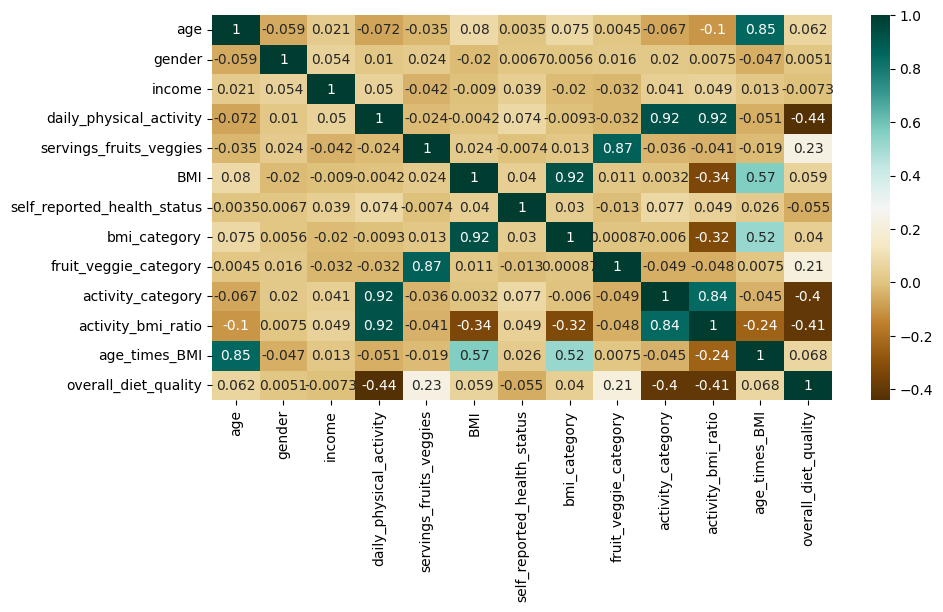

In [ ]:
plt.figure(figsize=(10,5))
c = df.corr()
sns.heatmap( c,cmap= 'BrBG', annot = True)
c

# Pemilihan Fitur

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


In [ ]:
df_encoded = df.copy()
label_encoder = LabelEncoder()

df_encoded['gender'] = label_encoder.fit_transform(df['gender'])
df_encoded['self_reported_health_status'] = label_encoder.fit_transform(df['self_reported_health_status'])


In [ ]:
df

,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category,fruit_veggie_category,activity_category,activity_bmi_ratio,age_times_BMI,age_group,activity_bmi_ratio_category,overall_diet_quality
0,56,0,49241,2,7,24.346840,4,0,1,0.0,0.082146,1363.423031,3,0,3.500000
1,46,1,64569,86,6,33.385717,1,2,1,2.0,2.575952,1535.742974,2,2,0.069767
2,32,1,31745,89,5,24.177333,4,0,1,2.0,3.681134,773.674645,1,3,0.056180
4,25,0,33025,87,4,32.182047,1,2,0,2.0,2.703371,804.551176,1,2,0.045977
6,56,0,26540,18,0,24.294505,1,0,0,0.0,0.740908,1360.492282,3,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,50,0,70601,110,9,39.095836,4,2,1,2.0,2.813599,1954.791799,2,2,0.081818
996,40,0,90968,66,9,31.951492,4,2,1,2.0,2.065631,1278.059679,2,2,0.136364
997,27,1,40644,7,6,30.789564,0,2,1,0.0,0.227350,831.318241,1,0,0.857143
998,61,0,38745,86,1,22.474026,2,0,0,2.0,3.826640,1370.915559,3,3,0.011628


In [ ]:
# Pisahkan fitur dan target
X = df.drop(['income', 'daily_physical_activity', 'servings_fruits_veggies', 'BMI', 'activity_bmi_ratio', 'age_times_BMI', 'overall_diet_quality'], axis=1)
y = df['self_reported_health_status']



In [ ]:
df = df.dropna()

In [ ]:
# Menghapus baris yang memiliki nilai NaN pada kolom 'activity_bmi_ratio_category'
df.dropna(subset=['activity_bmi_ratio_category'], inplace=True)

# Tampilkan hasil
df


,age,gender,income,daily_physical_activity,servings_fruits_veggies,BMI,self_reported_health_status,bmi_category,fruit_veggie_category,activity_category,activity_bmi_ratio,age_times_BMI,age_group,activity_bmi_ratio_category,overall_diet_quality
0,56,0,49241,2,7,24.346840,4,0,1,0.0,0.082146,1363.423031,3,0,3.500000
1,46,1,64569,86,6,33.385717,1,2,1,2.0,2.575952,1535.742974,2,2,0.069767
2,32,1,31745,89,5,24.177333,4,0,1,2.0,3.681134,773.674645,1,3,0.056180
4,25,0,33025,87,4,32.182047,1,2,0,2.0,2.703371,804.551176,1,2,0.045977
6,56,0,26540,18,0,24.294505,1,0,0,0.0,0.740908,1360.492282,3,0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
992,50,0,70601,110,9,39.095836,4,2,1,2.0,2.813599,1954.791799,2,2,0.081818
996,40,0,90968,66,9,31.951492,4,2,1,2.0,2.065631,1278.059679,2,2,0.136364
997,27,1,40644,7,6,30.789564,0,2,1,0.0,0.227350,831.318241,1,0,0.857143
998,61,0,38745,86,1,22.474026,2,0,0,2.0,3.826640,1370.915559,3,3,0.011628


In [ ]:
X

,age,gender,self_reported_health_status,bmi_category,fruit_veggie_category,activity_category,age_group,activity_bmi_ratio_category
0,56,0,4,0,1,0.0,3,0
1,46,1,1,2,1,2.0,2,2
2,32,1,4,0,1,2.0,1,3
4,25,0,1,2,0,2.0,1,2
6,56,0,1,0,0,0.0,3,0
...,...,...,...,...,...,...,...,...
992,50,0,4,2,1,2.0,2,2
996,40,0,4,2,1,2.0,2,2
997,27,1,0,2,1,0.0,1,0
998,61,0,2,0,0,2.0,3,3


In [ ]:
y

0      4
1      1
2      4
4      1
6      1
      ..
992    4
996    4
997    0
998    2
999    4
Name: self_reported_health_status, Length: 716, dtype: int64

In [ ]:
df.isnull().sum()

age                            0
gender                         0
income                         0
daily_physical_activity        0
servings_fruits_veggies        0
BMI                            0
self_reported_health_status    0
bmi_category                   0
fruit_veggie_category          0
activity_category              0
activity_bmi_ratio             0
age_times_BMI                  0
age_group                      0
activity_bmi_ratio_category    0
overall_diet_quality           0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
# Pisahkan dataset menjadi set pelatihan dan set pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Inisialisasi model Random Forest
model = RandomForestClassifier(random_state=42)

In [ ]:
df.isnull().sum()

age                            0
gender                         0
income                         0
daily_physical_activity        0
servings_fruits_veggies        0
BMI                            0
self_reported_health_status    0
bmi_category                   0
fruit_veggie_category          0
activity_category              0
activity_bmi_ratio             0
age_times_BMI                  0
age_group                      0
activity_bmi_ratio_category    0
overall_diet_quality           0
dtype: int64

In [ ]:
# Latih model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Prediksi menggunakan set pengujian
y_pred = model.predict(X_test)

In [ ]:
# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9930555555555556


In [ ]:
# Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        38
           2       0.96      1.00      0.98        25
           3       1.00      0.96      0.98        26
           4       1.00      1.00      1.00        35

    accuracy                           0.99       144
   macro avg       0.99      0.99      0.99       144
weighted avg       0.99      0.99      0.99       144



**Presisi**: Presisi adalah rasio prediksi benar positif dibandingkan dengan total hasil positif. Nilai presisi 1.00 untuk kelas 0, 1, dan 4 menunjukkan bahwa model ini sempurna dalam memprediksi kelas tersebut. Sedangkan untuk kelas 2 dan 3, presisinya sedikit lebih rendah, tetapi masih sangat tinggi (0.96 dan 1.00).

**Recall**: Recall adalah rasio prediksi benar positif dibandingkan dengan total sebenarnya positif. Nilai recall 1.00 untuk kelas 0, 1, 2, dan 4 menunjukkan bahwa model ini sempurna dalam mengidentifikasi semua instance positif untuk kelas tersebut. Untuk kelas 3, recallnya sedikit lebih rendah (0.96), menunjukkan bahwa model mungkin telah salah mengklasifikasikan beberapa instance positif.

**F1-Score**: F1-Score adalah rata-rata harmonik dari presisi dan recall. Nilai yang mendekati 1 menunjukkan bahwa model memiliki kinerja baik dalam presisi dan recall. Dalam hal ini, semua kelas memiliki F1-Score yang sangat tinggi, menunjukkan bahwa model ini memiliki kinerja yang baik.
Support: Support adalah jumlah sampel aktual dalam setiap kelas. Dalam hal ini, kelas 1 dan 4 memiliki support tertinggi, yang berarti ada lebih banyak sampel dari kelas ini dalam data Anda.

**Akurasi**: Akurasi adalah rasio prediksi benar (positif dan negatif) dibandingkan dengan total sampel. Akurasi model ini adalah 0.99, yang menunjukkan bahwa model ini sangat akurat dalam memprediksi kelas sampel.